In [ ]:
#!pip install numpy
#!pip install pandas

In [ ]:
import numpy as np
import math

# Implementation of a Node
# A node should be able to take an input vector (which is either the input or the previous layer)
# Sum the values from the previous node
# Pass the sum to an activation value
# Return the value as its own value

class node(object):
  def __init__(self, inputVec = [], weight = [], activation = None):
    # Number of Inputs
    self.inputVector = inputVec
    self.nodeWeights = weight
    self.actSelect = activation
    self.bias = np.random.rand()

    # Summation of Connected Notes
    self.nodeSum = self.summationNodes()

    # Activation function
    self.nodeVal = self.activation()

  # Parallelizable for all input values
  def summationNodes(self):
    sumOfVec = 0
    for (i, j) in zip(self.inputVector, self.nodeWeights):
        sumOfVec = sumOfVec + i * j
    return (sumOfVec + self.bias)

  def activation(self):
    if (self.actSelect == "sigmoid"):
      return (1 / (1 + pow(math.e, -self.nodeSum)))

    if (self.actSelect == "relu"):
      return (max(0.1*self.nodeSum, self.nodeSum))

In [ ]:
# For the mutli-layer perceptron
# We should first be able to store the input vector in an array
# Create N (user-defined number) nodes
# Allow users to add layers with custom nodes as a method of the class
# The output node automatically implements

class mlp(node):

  def __init__ (self):

    # We simulate the input layer here by storing each value
    # in the input as an element of a vector
    self.inputSize = None
    self.outputClass = []
    self.inputVector = [] # This is the vector we pass to the first hidden layer
    self.outputVal = None
    self.outputIndex = None

  def activate(self, inputVector, numClass):

    # We simulate the input layer here by storing each value
    # in the input as an element of a vector
    self.inputSize = len(inputVector)
    self.outputClass = numClass
    self.inputVector = inputVector # This is the vector we pass to the first hidden layer

    # Simulate hidden later
    layer1 = self.addLayer(numNodes = 10, prevLayer = self.inputVector)
    layer2 = self.addLayer(numNodes = 10, prevLayer = layer1)
    layer3 = self.addLayer(numNodes = 10, prevLayer = layer2)
    layer4 = self.addLayer(numNodes = 5, prevLayer = layer3)
    self.outputVal, self.outputIndex = self.outputLayer(layer4)

  # This intendeds to simulate the hidden layers
  def addLayer(self, numNodes = None, prevLayer = None):
    #weights = [np.random.rand() for i in range(len(inputVector))]

    if numNodes == None:
      numNodes = self.inputSize

    nextLayer = []
    for i in range(numNodes):
      # Create the nodes
      nextLayer.append(node(self.inputVector, [np.random.rand() for j in range(len(self.inputVector))], activation='relu'))

    outputValues = []
    for i in nextLayer:
      i.summationNodes()
      i.activation()
      outputValues.append(i.nodeVal)

    return outputValues

  def outputLayer(self, lastHidden):
    outLayer = []
    for i in range(self.outputClass):
      outLayer.append(node(lastHidden, [np.random.rand() for j in range(len(self.inputVector))], activation='sigmoid'))

    endVals = []
    for i in range(self.outputClass):
      endVals.append(outLayer[i].nodeVal)
      #print("Class ", i, " : ", outLayer[i].nodeVal)

    return max(endVals), endVals.index(max(endVals))

  def printResult(self):
    print("Predicted Class: ", self. outputIndex)

  def getPrediction(self):
    return self.outputIndex

In [ ]:
class MLP():

  def __init__ (self, tpb):
    # We simulate the input layer here by storing each value
    # in the input as an element of a vector
    self.inputSize = None
    self.outputClass = []
    self.inputVector = [] # This is the vector we pass to the first hidden layer
    self.outputVal = None
    self.outputIndex = None
    self.threads_per_block = tpb

  def activate(self, inputVector, numClass):
  # For now, this is just forward propagation

    # We simulate the input layer here by storing each value
    # in the input as an element of a vector
    self.inputSize = len(inputVector)
    self.outputClass = numClass
    self.inputVector = inputVector # This is the vector we pass to the first hidden layer

    # Simulate hidden later
    layer1 = self.addLayer(numNodes = 10, prevLayer = self.inputVector, activation = "relu")
    layer2 = self.addLayer(numNodes = 5, prevLayer = layer1, activation = "relu")
    #print(layer4)

    # Simulate output layer
    self.outputIndex = self.outputLayer(layer2)

  # This intendeds to simulate the hidden layers
  def addLayer(self, numNodes = None, prevLayer = None, activation = None):

    if numNodes == None:
      print("Indicate number of Nodes.")
      return

    # This will be where we store the new values
    newLayer = cp.zeros(numNodes)

    #activation_func(float* newLayer, const int choice)
    if activation == "sigmoid":
        activation = 1
    elif activation == "relu":
        activation = 2

    for i in range(numNodes):
    # add_kernel(grid_size, block_size, (x1, x2, y, size))
    # nodeSum_kernel(const float* inputVector, const float* layerWeights, float* outputNode, const float* bias)
      #print("Nodes: ", prevLayer)
      weights = cp.array([cp.random.random() for i in range(len(prevLayer))])
      #print("Weights: ", weights)
      bias = cp.random.random()
      #print("Bias: ", bias)

      newLayer[i] = np.dot(cp.array(prevLayer), cp.array(weights)) + bias
      #print("Node ", i, " : ", newLayer[i])


    returnLayer = cp.zeros(len(newLayer))


    threads_per_block = self.threads_per_block
    size = len(newLayer)
    grid_size = (int(math.ceil(size / threads_per_block)), 1, 1)
    block_size = (threads_per_block, 1, 1)

    start_gpu = cp.cuda.Event()
    end_gpu = cp.cuda.Event()

    activation_func(grid_size, block_size, (cp.array(newLayer), cp.array(returnLayer), activation))

    return returnLayer

  def outputLayer(self, lastHidden):
    outLayer = []
    for i in range(self.outputClass):
      outLayer.append(node(lastHidden, [cp.random.random() for j in range(len(self.inputVector))], activation='sigmoid'))

    endVals = []
    for i in range(self.outputClass):
      endVals.append(outLayer[i].nodeVal)
      #print("Class ", i, " : ", outLayer[i].nodeVal)

    return endVals.index(max(endVals))

  def printResult(self):
    print("Predicted Class: ", self. outputIndex)

  def getPrediction(self):
    return self.outputIndex

# Sample with the Iris Dataset

In [ ]:
# Loading the IRIS Dataset for Classification
import pandas as pd
import numpy as np
from sklearn import datasets

filepath = 'iris.csv'
iris = pd.read_csv(filepath)

iris.head()

# data (as pandas dataframes)
df_X = iris.iloc[:,:-1]
df_y = iris.iloc[:,-1]

#df_X = pd.DataFrame(df_X)
df_X.head()

#df_y = pd.DataFrame(df_y)
df_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
# Perform some data wrangling/preparation

# Check info on the attributes
df_X.info() # All values are same type, check if any missing values
df_X.isnull().sum() # To check if there are any null values

# Checking the output
df_y.info()

# Object Types must be converted
df_y_original = df_y.copy() # Store the df somewhere before modifying

df_y.value_counts()

# Reveals Three Classes
# Map classes to corresponding numerical values

outMap = {'setosa':0, 'versicolor':1, 'virginica':2}
df_y.replace(outMap, inplace=True)

print(df_y)
df_y.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


species
0    50
1    50
2    50
Name: count, dtype: int64

# Test out the CPU Model

In [ ]:
import time

In [ ]:
def testModel(model, inVector, appendList = []):
  for i in inVector:
    model.activate(i, 10)
    appendList.append(model.getPrediction())

In [ ]:
predictedVals = []
model = mlp()

start = time.time()
testModel(model, np.array(df_X), predictedVals)
end = time.time()
print("Elapsed CPU: ", end-start)

Elapsed CPU:  0.037357330322265625


In [ ]:
trueOutput = np.array(df_y)

correctPreds, totalPreds = 0, len(trueOutput)
for i in range(totalPreds):
  if predictedVals[i] == trueOutput[i]:
    correctPreds = correctPreds + 1

print("Correct Predictions / Total Predictions: {} / {} .".format(correctPreds, totalPreds))
print("Custom Feedforward Neural Network is: {} % Accurate".format(round(correctPreds/totalPreds * 100), 2))

Correct Predictions / Total Predictions: 17 / 150 .
Custom Feedforward Neural Network is: 11 % Accurate


# Implementation using reductionKernel

In [ ]:
# For implementation with CuPY
import cupy as cp

In [ ]:
# Reduction Kernel per Node
nodeSum_kernel = cp.ReductionKernel(
    'T inputVec, U inputWeight',  # input params
    'T outputVec',  # output params
    'inputVec * inputWeight',  # map
    'a + b',  # reduce
    'outputVec = a',  # post-reduction map
    '0',  # identity value
    'nodeSum_kernel'  # kernel name
)

# Activation Function Kernel
activation_func = cp.RawKernel(r'''
extern "C" __global__
void activation_func(const float* newLayer, float *returnLayer, const int choice) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    const float EULER_NUMBER = 2.718281828459045;

    if (choice == 1) returnLayer[tid] = (1 / (1 + pow(EULER_NUMBER, -1 * newLayer[tid])));
    if (choice == 2) returnLayer[tid] = max(0.1 * newLayer[tid], newLayer[tid]);
}
''', 'activation_func')

In [ ]:
class MLPcupy():

  def __init__ (self, tpb):
    # We simulate the input layer here by storing each value
    # in the input as an element of a vector
    self.inputSize = None
    self.outputClass = []
    self.inputVector = [] # This is the vector we pass to the first hidden layer
    self.outputVal = None
    self.outputIndex = None
    self.threads_per_block = tpb

  def activate(self, inputVector, numClass):
  # For now, this is just forward propagation

    # We simulate the input layer here by storing each value
    # in the input as an element of a vector
    self.inputSize = len(inputVector)
    self.outputClass = numClass
    self.inputVector = inputVector # This is the vector we pass to the first hidden layer

    # Simulate hidden later
    layer1 = self.addLayer(numNodes = 10, prevLayer = self.inputVector, activation = "relu")
    layer2 = self.addLayer(numNodes = 5, prevLayer = layer1, activation = "relu")
    #print(layer4)

    # Simulate output layer
    self.outputIndex = self.outputLayer(layer2)

  # This intendeds to simulate the hidden layers
  def addLayer(self, numNodes = None, prevLayer = None, activation = None):

    if numNodes == None:
      print("Indicate number of Nodes.")
      return

    # This will be where we store the new values
    newLayer = cp.zeros(numNodes)

    #activation_func(float* newLayer, const int choice)
    if activation == "sigmoid":
        activation = 1
    elif activation == "relu":
        activation = 2

    for i in range(numNodes):
    # add_kernel(grid_size, block_size, (x1, x2, y, size))
    # nodeSum_kernel(const float* inputVector, const float* layerWeights, float* outputNode, const float* bias)
      #print("Nodes: ", prevLayer)
      weights = cp.array([cp.random.random() for i in range(len(prevLayer))])
      #print("Weights: ", weights)
      bias = cp.random.random()
      #print("Bias: ", bias)

      newLayer[i] = nodeSum_kernel(cp.array(prevLayer), cp.array(weights), activation) + bias
      #print("Node ", i, " : ", newLayer[i])


    returnLayer = cp.zeros(len(newLayer))


    threads_per_block = self.threads_per_block
    size = len(newLayer)
    grid_size = (int(math.ceil(size / threads_per_block)), 1, 1)
    block_size = (threads_per_block, 1, 1)

    start_gpu = cp.cuda.Event()
    end_gpu = cp.cuda.Event()

    activation_func(grid_size, block_size, (cp.array(newLayer), cp.array(returnLayer), activation))

    return returnLayer

  def outputLayer(self, lastHidden):
    outLayer = []
    for i in range(self.outputClass):
      outLayer.append(node(lastHidden, [cp.random.random() for j in range(len(self.inputVector))], activation='sigmoid'))

    endVals = []
    for i in range(self.outputClass):
      endVals.append(outLayer[i].nodeVal)
      #print("Class ", i, " : ", outLayer[i].nodeVal)

    return endVals.index(max(endVals))

  def printResult(self):
    print("Predicted Class: ", self. outputIndex)

  def getPrediction(self):
    return self.outputIndex

# Testing CuPy Model

In [ ]:
model2 = MLPcupy(512)
outputCuPy = cp.zeros(len(df_X))

In [ ]:
def testGPUModel(model, inVector, outClasses, appendList = []):
  for i in range(len(inVector)):
    model.activate(cp.array(inVector[i]), outClasses)
    appendList[i] = model.getPrediction()

In [ ]:
testGPUModel(model2, cp.array(df_X), 3, outputCuPy)

In [ ]:
trueOutput = np.array(df_y)
predictedCuPy = np.array(outputCuPy.get())

correctPreds, totalPreds = 0, len(trueOutput)
for i in range(totalPreds):
  if predictedCuPy[i] == trueOutput[i]:
    correctPreds = correctPreds + 1

print("Correct Predictions / Total Predictions: {} / {} .".format(correctPreds, totalPreds))
print("Custom Feedforward Neural Network is: {} % Accurate".format(round(correctPreds/totalPreds * 100), 2))

Correct Predictions / Total Predictions: 58 / 150 .
Custom Feedforward Neural Network is: 39 % Accurate


# Using Models on MNIST Dataset

<Figure size 640x480 with 0 Axes>

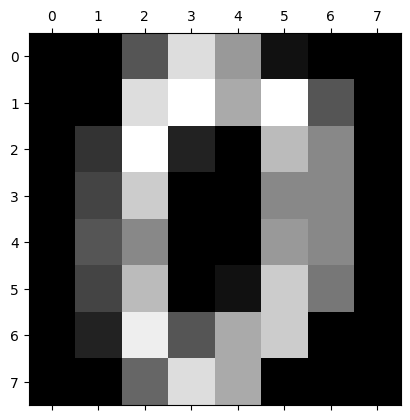

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
# Create the data to contain the array of images

numX = []
numY = []

for i in range(len(digits.data)):
    numX.append(np.array(digits.data[i]))
    numY.append(np.array(digits.target[i]))

print(numX[0])
print(numY[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [ ]:
# Test this on the CPU
predictedVals = []
model = mlp()

start = time.time()
testModel(model, np.array(numX), predictedVals)
end = time.time()
print("Elapsed CPU: ", end-start)

Elapsed CPU:  2.5493130683898926


In [ ]:
trueOutput = np.array(numY)

correctPreds, totalPreds = 0, len(trueOutput)
for i in range(totalPreds):
  if predictedVals[i] == trueOutput[i]:
    correctPreds = correctPreds + 1

print("Correct Predictions / Total Predictions: {} / {} .".format(correctPreds, totalPreds))
print("Custom Feedforward Neural Network is: {} % Accurate".format(round(correctPreds/totalPreds * 100), 2))

Correct Predictions / Total Predictions: 178 / 1797 .
Custom Feedforward Neural Network is: 10 % Accurate


In [ ]:
# Test this on the GPU
import time

start_gpu = cp.cuda.Event()
end_gpu = cp.cuda.Event()

In [ ]:
# Testing on the GPU
tpb_values = [16, 32, 64, 128, 256, 512]
time_record = []

start_gpu = cp.cuda.Event()
end_gpu = cp.cuda.Event()

def modelTestingGPU(size_tpb):
    print("Testing for ", size_tpb)
    model2 = MLPcupy(size_tpb)
    outputCuPy = cp.zeros(len(numX))

    start_gpu.record()
    testGPUModel(model2, cp.array(numX), 10, outputCuPy)
    end_gpu.record()
    end_gpu.synchronize()
    time_record.append(cp.cuda.get_elapsed_time(start_gpu, end_gpu))

    trueOutput = np.array(numY)
    predictedCuPy = np.array(outputCuPy.get())

    correctPreds, totalPreds = 0, len(trueOutput)
    for i in range(totalPreds):
      if predictedCuPy[i] == trueOutput[i]:
        correctPreds = correctPreds + 1

In [ ]:
for i in tpb_values:
    modelTestingGPU(i)

Testing for  16
Testing for  32
Testing for  64
Testing for  128
Testing for  256
Testing for  512


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
for i in time_record:
    print(i)

36719.32421875
36639.11328125
36647.48046875
36599.9765625
36645.4453125
36569.20703125


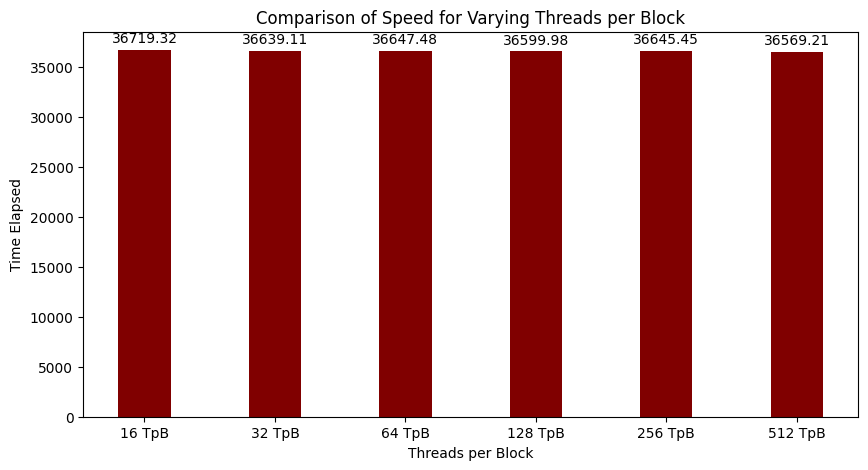

In [ ]:
# plt.bar(x, height, width, bottom, align)
# creating the dataset
data = {'16 TpB':round(time_record[0], 2), '32 TpB':round(time_record[1], 2), '64 TpB':round(time_record[2], 2),
		'128 TpB':round(time_record[3], 2), '256 TpB':round(time_record[4], 2), '512 TpB':round(time_record[5], 2)}
data_labels = list(data.keys())
data_values = list(data.values())

fig = plt.figure(figsize = (10, 5))

ax = fig.add_subplot(111)

# creating the bar plot
bars = ax.bar(data_labels, data_values, color ='maroon',
		width = 0.4)

for bar in bars:
   height = bar.get_height()
   ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
   textcoords="offset points", ha='center', va='bottom')

plt.xlabel("Threads per Block")
plt.ylabel("Time Elapsed")
plt.title("Comparison of Speed for Varying Threads per Block")
plt.show()

# Implementation with CuPy and JIT


In [95]:
no_samples=100000
no_features=10
no_classes=2

## Data Preparation

(100000, 10)
(100000,)


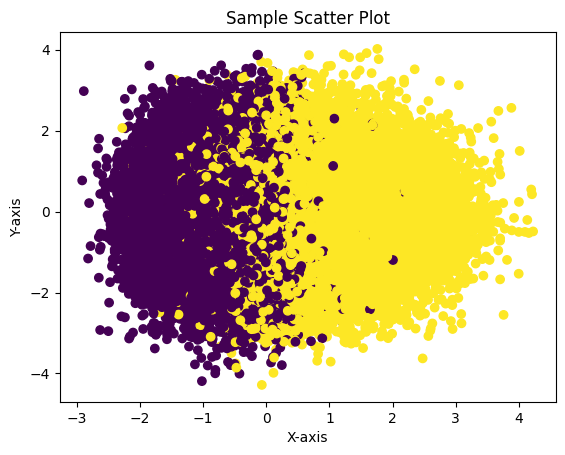

In [96]:
# Test on dummy data
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate data with 10 features, 1000 samples, and 2 classes with informative features
X, y = make_classification(n_samples=no_samples, n_features=no_features, n_classes=no_classes, random_state=42)

# X is the data (features), y are the labels (class assignments)
print(X.shape)  # Output: (100, 4) - 100 samples with 4 features each
print(y.shape)  # Output: (100,) - 100 labels (0 or 1)

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y)  # Using first two columns of X for x and y axes

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample Scatter Plot")

# Display the plot
plt.show()

## Create CPU Code First

In [97]:
# CPU Code First

import numpy as np
import pandas as pd
import math

# The input layer
# Load and ready the data to be passed to the hidden layer
def cpu_inputLayer(inputVec):
  vecToReturn = np.array(inputVec)
  return vecToReturn

# Once the input layer has received the input values
# The values are now ready to pass to the next layer
# This is now the hidden layer
def cpu_hiddenLayer(numNodes, inputLayer):
  # Accept the number of nodes for this hidden layer
  # Accepts the previous layer
  layerToReturn = []
  bias = np.random.random()

  # Per node, compute the product of the inputLayer and the randomized inputWeights
  for i in range(no_features):
    weights = np.random.random(no_features)
    layerToReturn.append(np.dot(inputLayer, weights) + bias)
    # Add the bias term to the node's sum

  # This layer outputs a vector containing the individual values per node
  # That must be passed to the individual node's activation function
  # Note: This function must be called multiple times if more layers are generated
  return layerToReturn

# This function is called to change the values of the input values
# Based on chosen activation function
def cpu_activationFunc(inputVector, activation = ""):
  activation = activation.lower()

  for i in inputVector:
    if activation == "sigmoid":
      i = (1 / 1 + np.exp(-1 * i))
    elif activation == "relu":
      i = np.max([0.01 * i, i])
    elif activation == "linear":
      i = i # No changes

  return inputVector

def cpu_outputLayer(prevLayer):
  outputLayer = cpu_hiddenLayer(no_classes, prevLayer)
  outputLayer = cpu_activationFunc(outputLayer, "sigmoid")

  return max(outputLayer), np.argmax(outputLayer)

## CPU Model Testing

In [98]:
# Model Testing Function

def testCPU(inputData):
  for i in range(len(inputData)):
    mlp_inputLayer = cpu_inputLayer(X[i])
    mlp_hiddenLayer1 = cpu_hiddenLayer(8, mlp_inputLayer)
    mlp_hiddenLayer1 = cpu_activationFunc(mlp_hiddenLayer1, "relu")
    mlp_hiddenLayer2 = cpu_hiddenLayer(5, mlp_hiddenLayer1)
    mlp_hiddenLayer2 = cpu_activationFunc(mlp_hiddenLayer2, "relu")
    mlp_outputLayer = cpu_outputLayer(mlp_hiddenLayer2)

In [99]:
import time

start_cpu = time.perf_counter()
testCPU(X)
end_cpu = time.perf_counter()
t_cpu = end_cpu - start_cpu

print("CPU Execution Time: ", t_cpu)

CPU Execution Time:  24.872077048999927


## Implementation using CuPy

In [100]:
# GPU Code First with CuPy

import cupy as cp
from cupyx import jit
import numpy as np
import math

nodeSum_kernel = cp.ReductionKernel(
    'T x, U y',  # input params
    'T z',  # output params
    'x * y',  # map
    'a + b',  # reduce
    'z = a',  # post-reduction map
    '0',  # identity value
    'nodeSum_kernel'  # kernel name
)

# The input layer
# Load and ready the data to be passed to the hidden layer
def cupy_inputLayer(inputVec):
  # Create array in the GPU
  vecToReturn = cp.array(inputVec)
  return vecToReturn

def generate_random_weights(numFeatures):
  # Generate weights for all nodes at once
  return cp.random.random(numFeatures)

# Part of this is parallelizable
def cupy_hiddenLayer(numNodes, inputLayer):
  # Accept the number of nodes for this hidden layer
  # Accepts the previous layer
  layerToReturn = cp.zeros(no_features)
  bias = cp.random.random()

  # Per node, compute the product of the inputLayer and the randomized inputWeights
  for i in range(no_features):
    weights = cp.random.random(no_features)
    #layerToReturn[i] = cp.dot(inputLayer, weights) + bias
    layerToReturn[i] = nodeSum_kernel(inputLayer, weights) + bias
    # Add the bias term to the node's sum

  # This layer outputs a vector containing the individual values per node
  # That must be passed to the individual node's activation function
  # Note: This function must be called multiple times if more layers are generated
  return layerToReturn

# Parallelized to be an element-wise copy
@cp.fuse(kernel_name='cupy_activationFunc')
def cupy_activationFunc(inputVector, outputVector, activation):

  def apply_activation(x):
    if activation == 1:
      return cp.reciprocal(1 + cp.exp(-1 * x))
    elif activation == 2:
      return cp.maximum(0.01 * x, x)
    elif activation == 3:
      return x
    else:
      raise ValueError("Invalid activation function")

  outputVector = apply_activation(inputVector)

def cupy_outputLayer(prevLayer):
  outputLayer = cupy_hiddenLayer(no_classes, prevLayer)
  outputLayer_y = cp.zeros(no_classes)
  cupy_activationFunc(outputLayer, outputLayer_y, 1)
  return cp.max(outputLayer), cp.argmax(outputLayer)

## GPU Testing

In [101]:
# Model Testing Function
# cupy_activationFunc(inputVector, outputVector, activation, size)
def testGPU_cupy(inputData):
  for i in range(len(inputData)):
    mlp_inputLayer = cupy_inputLayer(X[0])
    mlp_hiddenLayer1 = cupy_hiddenLayer(8, mlp_inputLayer)
    cupy_activationFunc(mlp_hiddenLayer1, mlp_hiddenLayer1, 2)
    mlp_hiddenLayer2 = cupy_hiddenLayer(5, mlp_hiddenLayer1)
    cupy_activationFunc(mlp_hiddenLayer2, mlp_hiddenLayer2, 2)
    mlp_outputLayer = cupy_outputLayer(mlp_hiddenLayer2)

In [102]:
start_gpu = cp.cuda.Event()
end_gpu = cp.cuda.Event()

start_gpu.record()
start_cpu = time.perf_counter()
testGPU_cupy(X)
end_cpu = time.perf_counter()
end_gpu.record()
end_gpu.record()
end_gpu.synchronize()
t_gpu = cp.cuda.get_elapsed_time(start_gpu, end_gpu)
t_cpu = end_cpu - start_cpu

print("Execution Time measured with CUDA Event: ", t_gpu)
print("Execution Time measured with time: ", t_cpu)

KeyboardInterrupt: 